In [1]:
# Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reference DF with US Federal Information Processing Standard state code and name

state_fips_code = pd.read_csv("../data/FIPS_state_code_reference.csv")
state_fips_code.head()

,fips,state_code,state_name,gnis_id
0,1,AL,Alabama,1779775
1,2,AK,Alaska,1785533
2,4,AZ,Arizona,1779777
3,5,AR,Arkansas,68085
4,6,CA,California,1779778


In [53]:
# Proess user input state

# selected_state = input("Please choose the state you are analyzing").title()
# if ((selected_state == 'Hawaii') | (selected_state == 'Alaska')):
#     print(f"Sorry. At the moment, We are not able to track weather data for the states Alaska and Hawaii. Enter any other US state")
# index=state_fips_code.loc[state_fips_code['state_name'] == selected_state]

# if ((selected_state != 'Hawaii') and (selected_state != 'Alaska')):
#     if index.empty:
#         print(f"No match for state {selected_state}. Please re-enter the state")
#         selected_state =''
#     else:
#         print(f"Processing data for {selected_state}")

Please choose the state you are analyzing nevada


Processing data for Nevada


In [3]:
#  FIPS state codes are numeric and two-letter alphabetic codes defined in U.S. Federal Information Processing Standard Publication ("FIPS PUB") 5-2 to identify U.S. states.

temperature_rate = pd.read_csv("../data/model_state.csv")
temperature_rate.head()

,fips,Fall,Spring,Summer,Winter,max_warming_season,Annual,state_code,state_name,gnis_id
0,1,-0.195668,-0.105862,-0.325009,0.458526,Winter,-0.035048,AL,Alabama,1779775
1,4,1.203951,1.384480,1.274455,1.388388,Winter,1.319880,AZ,Arizona,1779777
2,5,-0.042540,0.266399,0.058596,0.532247,Winter,0.214074,AR,Arkansas,68085
3,6,1.570921,1.449242,1.478335,1.412430,Fall,1.480561,CA,California,1779778
4,8,1.055309,1.436910,1.367845,1.838758,Winter,1.438589,CO,Colorado,1779779


In [13]:
# This dataset presents the age-adjusted death rates for the 10 leading causes of death in the United States beginning in 1999. ICD (International Classification of Diseases)

mortality_rate = (pd.read_csv("../data/mortality_rate_by_US_state.csv")
                      .rename(columns={"Year":"year",
                                       '113 Cause Name': 'icd_cause_name',
                                      'Cause Name': 'cause_name',
                                      'State': 'state_name',
                                      'Deaths':'deaths',
                                      'Age-adjusted Death Rate':'age_adjusted_death_rate'}))
mortality_rate.head()

,year,icd_cause_name,cause_name,state_name,deaths,age_adjusted_death_rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0


In [5]:
# Load climate data by US State FIPS code along with the merged state name for the fips

climate_change = (pd.read_csv("../data/climdiv_state_year.csv")
                          .merge(state_fips_code)
                          .rename(columns = {'temp':'temparature_fahrenheit',
                                              'tempc':'temperature_celsius'}))
climate_change.head()

,fips,year,temparature_fahrenheit,temperature_celsius,state_code,state_name,gnis_id
0,1,1895,61.641667,16.467593,AL,Alabama,1779775
1,1,1896,64.266667,17.925926,AL,Alabama,1779775
2,1,1897,64.191667,17.884259,AL,Alabama,1779775
3,1,1898,62.983333,17.212963,AL,Alabama,1779775
4,1,1899,63.100000,17.277778,AL,Alabama,1779775


In [14]:
# Identify the mortality data by cause "cancer" to analyze the impact of temperature increase

cancer_rate_df = mortality_rate.loc[(mortality_rate["cause_name"]=="Cancer") & (mortality_rate["year"]>1999)]
cancer_rate_df

,year,icd_cause_name,cause_name,state_name,deaths,age_adjusted_death_rate
1923,2016,Malignant neoplasms (C00-C97),Cancer,Alabama,10419,174.0
1924,2015,Malignant neoplasms (C00-C97),Cancer,Alabama,10354,175.6
1925,2014,Malignant neoplasms (C00-C97),Cancer,Alabama,10286,177.6
1926,2013,Malignant neoplasms (C00-C97),Cancer,Alabama,10328,182.2
1927,2012,Malignant neoplasms (C00-C97),Cancer,Alabama,10276,185.2
...,...,...,...,...,...,...
2853,2004,Malignant neoplasms (C00-C97),Cancer,Wyoming,875,171.7
2854,2003,Malignant neoplasms (C00-C97),Cancer,Wyoming,943,188.9
2855,2002,Malignant neoplasms (C00-C97),Cancer,Wyoming,859,177.1
2856,2001,Malignant neoplasms (C00-C97),Cancer,Wyoming,923,194.0


In [15]:
# Climate change data from year 2000 for the selected state.

climate_df =climate_change.loc[(climate_change["year"]>1999) & (climate_change["year"]<2017)]
climate_df

,fips,year,temparature_fahrenheit,temperature_celsius,state_code,state_name,gnis_id
105,1,2000,63.566667,17.537037,AL,Alabama,1779775
106,1,2001,63.033333,17.240741,AL,Alabama,1779775
107,1,2002,63.575000,17.541667,AL,Alabama,1779775
108,1,2003,62.733333,17.074074,AL,Alabama,1779775
109,1,2004,63.333333,17.407407,AL,Alabama,1779775
...,...,...,...,...,...,...,...
5992,56,2012,44.791667,7.106481,WY,Wyoming,1779807
5993,56,2013,41.675000,5.375000,WY,Wyoming,1779807
5994,56,2014,42.125000,5.625000,WY,Wyoming,1779807
5995,56,2015,44.158333,6.754630,WY,Wyoming,1779807


In [18]:
whole_data

,year,icd_cause_name,cause_name,state_name,deaths,age_adjusted_death_rate,fips,temparature_fahrenheit,temperature_celsius,state_code,gnis_id
0,2016,Malignant neoplasms (C00-C97),Cancer,Alabama,10419,174.0,1.0,65.341667,18.523148,AL,1779775.0
1,2015,Malignant neoplasms (C00-C97),Cancer,Alabama,10354,175.6,1.0,64.616667,18.120370,AL,1779775.0
2,2014,Malignant neoplasms (C00-C97),Cancer,Alabama,10286,177.6,1.0,62.033333,16.685185,AL,1779775.0
3,2013,Malignant neoplasms (C00-C97),Cancer,Alabama,10328,182.2,1.0,62.600000,17.000000,AL,1779775.0
4,2012,Malignant neoplasms (C00-C97),Cancer,Alabama,10276,185.2,1.0,64.916667,18.287037,AL,1779775.0
...,...,...,...,...,...,...,...,...,...,...,...
879,2004,Malignant neoplasms (C00-C97),Cancer,Wyoming,875,171.7,56.0,42.408333,5.782407,WY,1779807.0
880,2003,Malignant neoplasms (C00-C97),Cancer,Wyoming,943,188.9,56.0,43.050000,6.138889,WY,1779807.0
881,2002,Malignant neoplasms (C00-C97),Cancer,Wyoming,859,177.1,56.0,41.375000,5.208333,WY,1779807.0
882,2001,Malignant neoplasms (C00-C97),Cancer,Wyoming,923,194.0,56.0,43.200000,6.222222,WY,1779807.0


In [37]:
# Calculation of key performance indicators

whole_data = cancer_rate_df.merge(climate_df , how= 'outer', on=["year","state_name"] )
yearly_cancer= whole_data.groupby(by=[whole_data["year"],whole_data["state_name"]]).sum(["deaths"])
temperature_yearly = whole_data.groupby(by=[whole_data["year"],whole_data["state_name"]]).mean(["temperature_celsius"])
yearly_cancer_deaths= yearly_cancer[["deaths"]]
temperature_yearly_change = temperature_yearly[["temperature_celsius"]]
annual_change = temperature_yearly_change.merge(yearly_cancer_deaths, on=["year","state_name"])
annual_change

temperature_celsius  deaths
year state_name                                
2000 Alabama                  17.537037    9807
     Alaska                         NaN     704
     Arizona                  16.486111    9073
     Arkansas                 16.050926    6090
     California               14.888889   53158
...                                 ...     ...
2016 Virginia                 13.953704   15027
     Washington                9.208333   12594
     West Virginia            12.300926    4659
     Wisconsin                 7.884259   11498
     Wyoming                   6.615741     962

[884 rows x 2 columns]

In [39]:
# annual_change = annual_change.reset_index()
# for selected_state in state_fips_code["state_name"]:
#     if ((selected_state != 'Hawaii') and (selected_state != 'Alaska')):
#         print(f"Processing state {selected_state}")
#         print(annual_change.index)

Processing state Alabama
RangeIndex(start=0, stop=884, step=1)
Processing state Arizona
RangeIndex(start=0, stop=884, step=1)
Processing state Arkansas
RangeIndex(start=0, stop=884, step=1)
Processing state California
RangeIndex(start=0, stop=884, step=1)
Processing state Colorado
RangeIndex(start=0, stop=884, step=1)
Processing state Connecticut
RangeIndex(start=0, stop=884, step=1)
Processing state Delaware
RangeIndex(start=0, stop=884, step=1)
Processing state Florida
RangeIndex(start=0, stop=884, step=1)
Processing state Georgia
RangeIndex(start=0, stop=884, step=1)
Processing state Idaho
RangeIndex(start=0, stop=884, step=1)
Processing state Illinois
RangeIndex(start=0, stop=884, step=1)
Processing state Indiana
RangeIndex(start=0, stop=884, step=1)
Processing state Iowa
RangeIndex(start=0, stop=884, step=1)
Processing state Kansas
RangeIndex(start=0, stop=884, step=1)
Processing state Kentucky
RangeIndex(start=0, stop=884, step=1)
Processing state Louisiana
RangeIndex(start=0, st

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

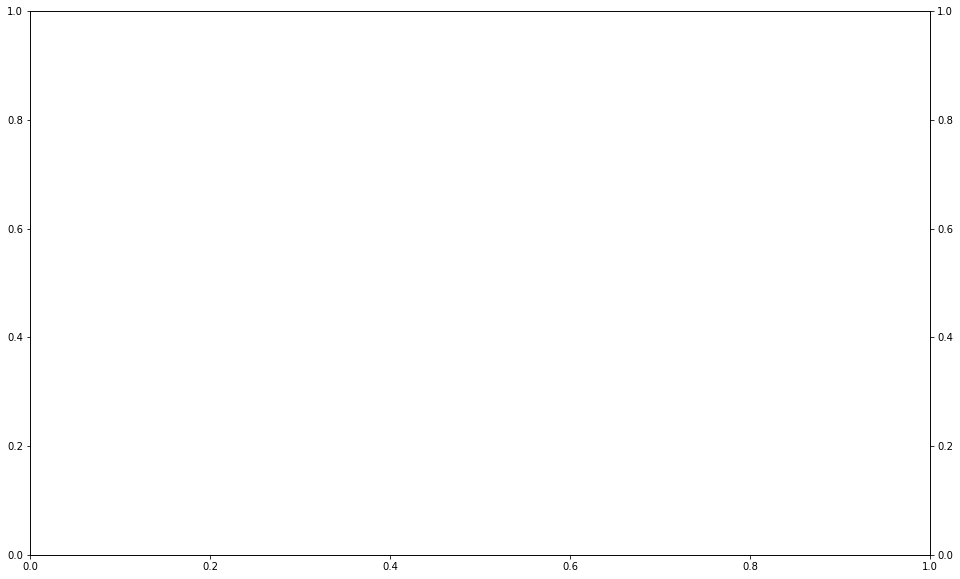

In [32]:
# plot the graphs to indicate the impact of climate change on human deaths due to cancer

for selected_state in state_fips_code["state_name"]:
    if ((selected_state != 'Hawaii') and (selected_state != 'Alaska')):
        fig, ax = plt.subplots()
        fig.subplots_adjust(right=0.75)
        fig.set_figheight(10)
        fig.set_figwidth(20)
        twin1 = ax.twinx()
        ax.bar(annual_change.index, annual_change["temperature_celsius"], color="r", label="Temperature",alpha=0.75, tick_label = annual_change.index)
        twin1.plot(annual_change.index, annual_change["deaths"], label="Deaths")
        ylabel = f"{selected_state} Temperature"
        twin_ylabel = f"{selected_state} Deaths"
        ax.set_xlabel("Years")
        ax.set_ylabel(ylabel)
        twin1.set_ylabel(twin_ylabel)
        tkw = dict(size=4, width=1.5)
        ax.tick_params(axis='x', **tkw)
        filename=f"../images/{selected_state}.png"
        plt.savefig(filename)
        # plt.grid()
        plt.legend()
        # plt.show()